# 코로나 데이터 시각화 개요

***
### 목표 : 코로나 확산 방지와 예방을 위한 인사이트 도출
### 주제 : 확진자 현황 및 행동 특성 분석으로 공중보건의 개입의 효과 시각화
### 결론 : 사회적 거리두기의 필요성 입증
***

1. 코로나 확진 현황
    * 지역별 확진 현황
    * 증상별 확진 현황
    * 성별 확진 현황
    * 연령별 확진 현황
2. 확진자 행동 특성
    * 확진자 감염 경로
    * 확진자 이동 경로
    * 확진자 접촉 정도
    * 1월과 3,4월 유동인구 비교 분석
3. 사회적 거리두기의 필요성

사회적 거리두기 :
>정부는 코로나19가 국내에서 확산된 2020년 3월 22일부터 4월 19일까지 강력한 사회적 거리두기를 시행하다가, 
4월 20일부터 5월 5일까지는 다소 완화한 형태의 사회적 거리두기를 시행했다. 
이후 코로나19 확산세가 주춤하면서 5월 6일부터는 '생활 속 거리두기' 체계로 전환해 시행했다. 
그리고 6월 28일에는 각종 거리두기의 명칭을 '사회적 거리두기'로 통일하고, 
코로나19 유행의 심각성과 방역조치의 강도에 따라 대책을 1∼3단계로 구분해 시행한다고 밝혔다. 
그러다 8월 중순부터 수도권 지역을 중심으로 코로나19 확진자가 급증하자 
수도권에 대한 강화된 사회적 거리두기 2단계 조치를 8월 19일 0시부터 시행한 데 이어, 
8월 23일 0시부터는 2단계 조치를 전국으로 확대하였다. 

> 한편, 2020년 8월 중순부터 서울 성북구 사랑제일교회를 비롯한 수도권 지역의 교회들과 커피숍 등지에서 코로나19 확진자 수가 급증, 
신천지 대구교회와 서울 이태원클럽에 이어 3번째로 대규모 폭발이 이뤄지면서 우려를 높이고 있다.

> 출처 : [네이버 지식백과] 사회적 거리두기 (시사상식사전, pmg 지식엔진연구소)

#### 패키지 불러오기

In [1]:
# !pip install plotly

In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px

import datetime
from datetime import date, timedelta

import plotly.offline as py

import folium 
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

import os

In [3]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#### 데이터 살펴보기

Time.csv : 누적 확진자 데이터

TimeProvince.csv : 코로나 확진자 데이터

TimeAge.csv : 연령별 코로나 확진자 데이터

SeoulFloating.csv : 서울 유동인구 데이터

Policy.csv : 코로나 관련 정책 데이터

PatientInfo.csv : 코로나 확진자 정보 데이터

Region.csv : 지역&지리 정보 데이터

PatientRoute.csv : 코로나 확진자 이동경로 데이터

In [4]:
time = pd.read_csv("TIme.csv")
province = pd.read_csv('TimeProvince.csv')
age = pd.read_csv("TimeAge.csv")
floating = pd.read_csv("SeoulFloating.csv")
policy = pd.read_csv("Policy.csv")
patient = pd.read_csv("PatientInfo.csv")
region = pd.read_csv("Region.csv")
route = pd.read_csv("PatientRoute.csv")

#### 코로나 확진 현황

In [5]:
p = province.copy()
p1 = p.groupby(by='date').sum().reset_index()
p

date  time          province  confirmed  released  deceased
0     2020-01-20    16             Seoul          0         0         0
1     2020-01-20    16             Busan          0         0         0
2     2020-01-20    16             Daegu          0         0         0
3     2020-01-20    16           Incheon          1         0         0
4     2020-01-20    16           Gwangju          0         0         0
...          ...   ...               ...        ...       ...       ...
2256  2020-05-31     0      Jeollabuk-do         21        19         0
2257  2020-05-31     0      Jeollanam-do         19        17         0
2258  2020-05-31     0  Gyeongsangbuk-do       1379      1295        54
2259  2020-05-31     0  Gyeongsangnam-do        123       121         0
2260  2020-05-31     0           Jeju-do         15        13         0

[2261 rows x 6 columns]

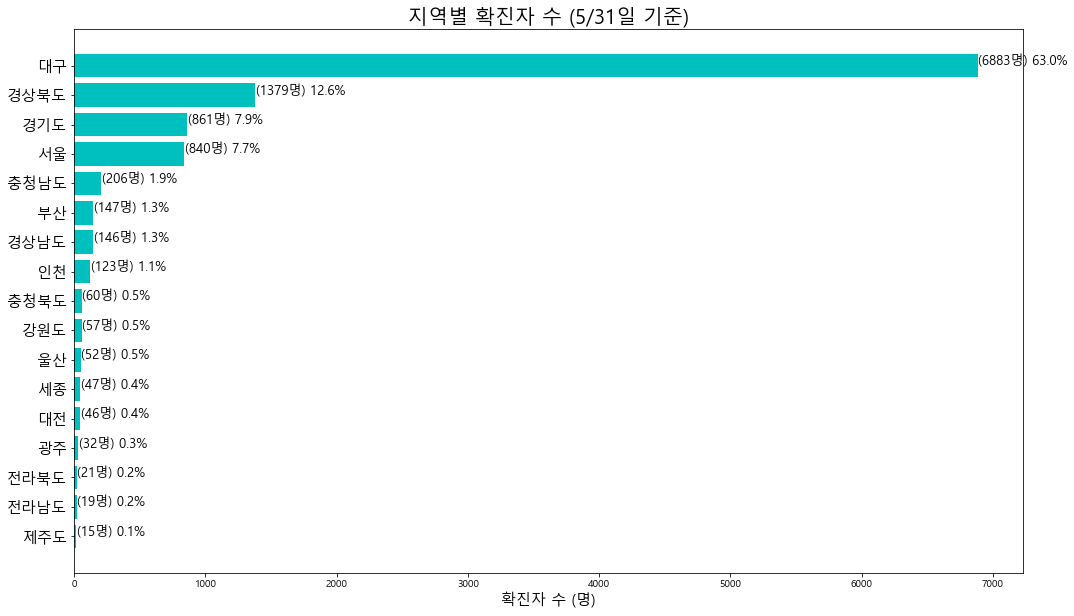

In [6]:
# 지역별 확진 현황

province=province[province['date']=='2020-05-31']

province_sort = sorted(list(zip(province['province'],province['confirmed'])),key=(lambda x:x[1]))
index_province = [ x[0] for x in province_sort]
values_province = [ y[1] for y in province_sort]

korean = ['제주도','전라남도','전라북도','광주','대전','세종','울산','강원도','충청북도','인천','경상남도','부산','충청남도','서울','경기도','경상북도','대구']
plt.figure(figsize=(17,10))

X=np.arange(len(korean))
plt.barh(X,values_province,tick_label = korean,color='c')
plt.title('지역별 확진자 수 (5/31일 기준)',fontsize=20)
plt.xlabel('확진자 수 (명)',fontsize=15)
plt.yticks(fontsize=15)

vvv=[] ; totalloc=sum(values_province)
for i in range(len(values_province)):
    vvv.append(values_province[i]/totalloc*100)


for x,y in enumerate(X):
    datall = "(%d명)"%values_province[x]+" %.1f"%vvv[x]+"%"
    plt.text(values_province[x]+3,y,datall, fontsize=13)
    

plt.show()

In [7]:
# 증상별 확진 현황

isolate_pct = 100 * patient.query('state == "isolated"').shape[0] / patient.shape[0]
release_pct = 100 * patient.query('state == "released"').shape[0] / patient.shape[0]
decease_pct = 100 * patient.query('state == "deceased"').shape[0] / patient.shape[0]

print('전체 환자 중 "격리" 환자는', round(isolate_pct,2),'% 입니다')
print('전체 환자 중 "격리 해제" 환자는', round(release_pct,2),'% 입니다')
print('전체 환자 중 "사망" 환자는', round(decease_pct,2),'% 입니다')

전체 환자 중 "격리" 환자는 39.71 % 입니다
전체 환자 중 "격리 해제" 환자는 58.44 % 입니다
전체 환자 중 "사망" 환자는 1.85 % 입니다


In [8]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
    fig.show()

In [9]:
pie_chart(patient, 'state', title = 'Isolated / Released / Deceased patient pie chart')

In [10]:
# 성별 확진 현황

release = patient.query('state == "released"')
isolate = patient.query('state == "isolated"')
decease = patient.query('state == "deceased"')

pie_chart(data = release, col = 'sex', title = '"Released" patient sex distribution')
pie_chart(data = isolate, col = 'sex', title = '"Isolated" patient sex distribution')
pie_chart(data = decease, col = 'sex', title = '"Deceased" patient sex distribution')

In [11]:
# 연령별 확진 현황

regional_patient = pd.merge(patient[['patient_id','confirmed_date','sex','age','province','city']],
                            region[['province','city','latitude','longitude']], 
                            how = 'left', on = ['province','city'])

age0_patient = regional_patient.query('age == "0s"')[['latitude','longitude']].dropna()
age10_patient = regional_patient.query('age == "10s"')[['latitude','longitude']].dropna()
age20_patient = regional_patient.query('age == "20s"')[['latitude','longitude']].dropna()
age30_patient = regional_patient.query('age == "30s"')[['latitude','longitude']].dropna()
age40_patient = regional_patient.query('age == "40s"')[['latitude','longitude']].dropna()
age50_patient = regional_patient.query('age == "50s"')[['latitude','longitude']].dropna()
age60_patient = regional_patient.query('age == "60s"')[['latitude','longitude']].dropna()
age70_patient = regional_patient.query('age == "70s"')[['latitude','longitude']].dropna()
age80_patient = regional_patient.query('age == "80s"')[['latitude','longitude']].dropna()
age90_patient = regional_patient.query('age == "90s"')[['latitude','longitude']].dropna()



m = folium.Map([36, 128], zoom_start=7) 

initial = folium.plugins.MarkerCluster(control=False)

m.add_child(initial)


age0_g = plugins.FeatureGroupSubGroup(initial, '0s'); m.add_child(age0_g)
age10_g = plugins.FeatureGroupSubGroup(initial, '10s'); m.add_child(age10_g)
age20_g = plugins.FeatureGroupSubGroup(initial, '20s'); m.add_child(age20_g)
age30_g = plugins.FeatureGroupSubGroup(initial, '30s'); m.add_child(age30_g)
age40_g = plugins.FeatureGroupSubGroup(initial, '40s'); m.add_child(age40_g)
age50_g = plugins.FeatureGroupSubGroup(initial, '50s'); m.add_child(age50_g)
age60_g = plugins.FeatureGroupSubGroup(initial, '60s'); m.add_child(age60_g)
age70_g = plugins.FeatureGroupSubGroup(initial, '70s'); m.add_child(age70_g)
age80_g = plugins.FeatureGroupSubGroup(initial, '80s'); m.add_child(age80_g)
age90_g = plugins.FeatureGroupSubGroup(initial, '90s'); m.add_child(age90_g)


plugins.MarkerCluster(age0_patient).add_to(age0_g)
plugins.MarkerCluster(age10_patient).add_to(age10_g)
plugins.MarkerCluster(age20_patient).add_to(age20_g)
plugins.MarkerCluster(age30_patient).add_to(age30_g)
plugins.MarkerCluster(age40_patient).add_to(age40_g)
plugins.MarkerCluster(age50_patient).add_to(age50_g)
plugins.MarkerCluster(age60_patient).add_to(age60_g)
plugins.MarkerCluster(age70_patient).add_to(age70_g)
plugins.MarkerCluster(age80_patient).add_to(age80_g)
plugins.MarkerCluster(age90_patient).add_to(age90_g)


folium.LayerControl(collapsed=False).add_to(m)

m

#### 확진자의 행동특성

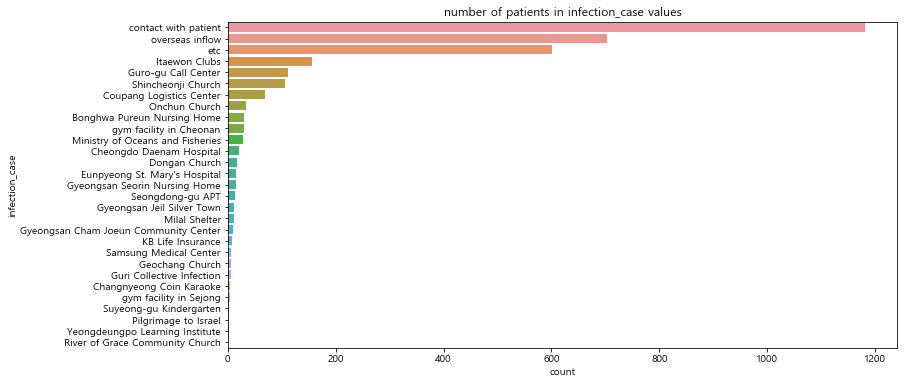

In [12]:
# 감염 경로

data = patient.copy()

n_infection_case = data.groupby(['infection_case'])['patient_id'].count()
n_infection_case = n_infection_case.reset_index()
n_infection_case.rename(columns = {'patient_id': 'count'}, inplace = True)

n_infection_case = n_infection_case.sort_values('count', ascending = False)

plt.figure(figsize = (12,6))
plt.title('number of patients in infection_case values')
sns.barplot(y = 'infection_case', x= 'count', data = n_infection_case)
display()

In [13]:
def categorisation(x):
    
    '''
    categorises infection types
    '''
    
    if x == 'overseas inflow':
        y = 'overseas'
    elif x == 'contact with patient': 
        y = 'individual'
    elif (x == 'etc') | (pd.isna(x)):
        y = 'unknown'
    else: 
        y = 'group' 
    
    return y 

data['infection'] = data['infection_case'].apply(lambda x: categorisation(x))
print(data.shape)
data.head()

(4004, 19)


patient_id  global_num     sex birth_year  age country province  \
0  1000000001         2.0    male       1964  50s   Korea    Seoul   
1  1000000002         5.0    male       1987  30s   Korea    Seoul   
2  1000000003         6.0    male       1964  50s   Korea    Seoul   
3  1000000004         7.0    male       1991  20s   Korea    Seoul   
4  1000000005         9.0  female       1992  20s   Korea    Seoul   

          city disease        infection_case  infection_order infected_by  \
0   Gangseo-gu     NaN       overseas inflow              1.0         NaN   
1  Jungnang-gu     NaN       overseas inflow              1.0         NaN   
2    Jongno-gu     NaN  contact with patient              2.0  2002000001   
3      Mapo-gu     NaN       overseas inflow              1.0         NaN   
4  Seongbuk-gu     NaN  contact with patient              2.0  1000000002   

  contact_number symptom_onset_date confirmed_date released_date  \
0             75         2020-01-22     2020-01-23    2020-02-05   
1             31                NaN     2020-01-30    2020-03-02   
2             17                NaN     2020-01-30    2020-02-19   
3              9         2020-01-26     2020-01-30    2020-02-15   
4              2                NaN     2020-01-31    2020-02-24   

  deceased_date     state   infection  
0           NaN  released    overseas  
1           NaN  released    overseas  
2           NaN  released  individual  
3           NaN  released    overseas  
4           NaN  released  individual

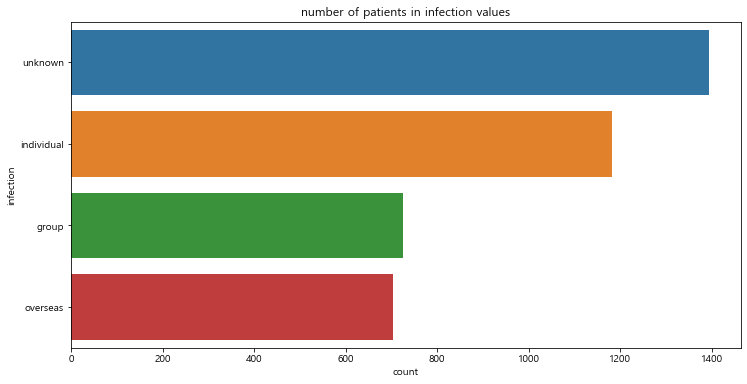

In [14]:
n_infection_case = data.groupby(['infection'])['patient_id'].count()
n_infection_case = n_infection_case.reset_index()
n_infection_case.rename(columns = {'patient_id': 'count'}, inplace = True)

n_infection_case = n_infection_case.sort_values('count', ascending = False)

plt.figure(figsize = (12,6))
sns.barplot(y = 'infection', x= 'count', data = n_infection_case)
plt.title('number of patients in infection values')
display()

In [15]:
# 이동 경로

leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

essential = essential_edu + essential_admin + necessity + medical

# '필수 교육(essential_edu)/필수 행정(essential_admin)/생활 필수(necessity)/의료(medical)' 카테고리를 
# 필수적 이동(essential)으로 구분하고, 
# 나머지는 부수적 이동(non-essential)으로 정의

def type_group_essen(x): 
     
    group = None
    if x in essential: 
        group = 'essential'
    else:
        group = 'non-essential' 
    return group 

route['route_group_essential'] = route['type'].apply(lambda x: type_group_essen(x)) 
route = route[['patient_id', 'type', 'route_group_essential']]

route['route_value'] = 1
g = pd.DataFrame(route.groupby(['patient_id', 'route_group_essential'])['route_value'].count().unstack())

g.fillna(0, inplace = True)
g.reset_index(inplace = True)
g = g[['patient_id', 'essential', 'non-essential']]

data = data.merge(g, left_on = 'patient_id', right_on = 'patient_id', how = 'left')

data = data[(data['essential'].notna()) & (data['non-essential'].notna())] 

data

patient_id  global_num     sex birth_year  age country  \
0     1000000001         2.0    male       1964  50s   Korea   
1     1000000002         5.0    male       1987  30s   Korea   
2     1000000003         6.0    male       1964  50s   Korea   
3     1000000004         7.0    male       1991  20s   Korea   
4     1000000005         9.0  female       1992  20s   Korea   
...          ...         ...     ...        ...  ...     ...   
3953  6100000086         NaN    male       1966  50s   Korea   
3954  6100000087         NaN  female       1967  50s   Korea   
3955  6100000088         NaN    male       1994  20s   Korea   
3956  6100000089         NaN    male       1960  60s   Korea   
3957  6100000090         NaN    male       1980  40s   Korea   

              province         city disease        infection_case  ...  \
0                Seoul   Gangseo-gu     NaN       overseas inflow  ...   
1                Seoul  Jungnang-gu     NaN       overseas inflow  ...   
2                Seoul    Jongno-gu     NaN  contact with patient  ...   
3                Seoul      Mapo-gu     NaN       overseas inflow  ...   
4                Seoul  Seongbuk-gu     NaN  contact with patient  ...   
...                ...          ...     ...                   ...  ...   
3953  Gyeongsangnam-do  Changwon-si     NaN                   etc  ...   
3954  Gyeongsangnam-do  Changwon-si     NaN                   etc  ...   
3955  Gyeongsangnam-do  Changwon-si     NaN                   etc  ...   
3956  Gyeongsangnam-do    Haman-gun     NaN                   etc  ...   
3957  Gyeongsangnam-do   Yangsan-si     NaN       overseas inflow  ...   

      infected_by contact_number symptom_onset_date confirmed_date  \
0             NaN             75         2020-01-22     2020-01-23   
1             NaN             31                NaN     2020-01-30   
2      2002000001             17                NaN     2020-01-30   
3             NaN              9         2020-01-26     2020-01-30   
4      1000000002              2                NaN     2020-01-31   
...           ...            ...                ...            ...   
3953          NaN            NaN         2020-03-15     2020-03-19   
3954          NaN            NaN         2020-03-16     2020-03-21   
3955          NaN            NaN         2020-03-06     2020-03-22   
3956   6002000035            NaN         2020-03-22     2020-03-23   
3957          NaN            NaN         2020-03-25     2020-03-26   

     released_date deceased_date     state   infection essential  \
0       2020-02-05           NaN  released    overseas       1.0   
1       2020-03-02           NaN  released    overseas       9.0   
2       2020-02-19           NaN  released  individual       0.0   
3       2020-02-15           NaN  released    overseas       1.0   
4       2020-02-24           NaN  released  individual       1.0   
...            ...           ...       ...         ...       ...   
3953           NaN           NaN  isolated     unknown       2.0   
3954           NaN           NaN  isolated     unknown       6.0   
3955    2020-04-19           NaN  released     unknown       5.0   
3956           NaN           NaN  released     unknown       1.0   
3957           NaN           NaN  released    overseas       3.0   

      non-essential  
0               1.0  
1               4.0  
2               2.0  
3               0.0  
4               0.0  
...             ...  
3953            2.0  
3954            2.0  
3955           19.0  
3956            1.0  
3957            4.0  

[1472 rows x 21 columns]

In [16]:
# 접촉 정도

data = data[data['contact_number'].notna()]
data['contact_number'].describe()

count     369
unique     68
top         0
freq       44
Name: contact_number, dtype: object

In [17]:
data_ = data[['patient_id',  
              'contact_number', 
              'essential', 'non-essential', 
              'infection']]
data_.reset_index(drop = True, inplace = True)
print(data_.shape)
data_.head()

(369, 5)


patient_id contact_number  essential  non-essential   infection
0  1000000001             75        1.0            1.0    overseas
1  1000000002             31        9.0            4.0    overseas
2  1000000003             17        0.0            2.0  individual
3  1000000004              9        1.0            0.0    overseas
4  1000000005              2        1.0            0.0  individual

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = 'auto', sparse=False)
encoder.fit(np.array(data_['infection']).reshape(-1, 1))
inf_dummies = encoder.transform(np.array(data_['infection']).reshape(-1, 1))
dummies = pd.DataFrame(inf_dummies.astype(int), columns = ['infection_' + x for x in encoder.categories_[0]])

data_ = data_.join(dummies)
print(data_.shape)
data_.head()

(369, 9)


patient_id contact_number  essential  non-essential   infection  \
0  1000000001             75        1.0            1.0    overseas   
1  1000000002             31        9.0            4.0    overseas   
2  1000000003             17        0.0            2.0  individual   
3  1000000004              9        1.0            0.0    overseas   
4  1000000005              2        1.0            0.0  individual   

   infection_group  infection_individual  infection_overseas  \
0                0                     0                   1   
1                0                     0                   1   
2                0                     1                   0   
3                0                     0                   1   
4                0                     1                   0   

   infection_unknown  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

# 여기하시면 됩니다!

In [19]:
# 서울 유동인구 데이터 불러오기

floating['dayofweek'] = floating['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").weekday()).astype('str')
floating['month'] = floating['date'].apply(lambda x: x[6:7]) 
floating['new_date'] = floating['month'].astype('str') + '/' + floating['date'].apply(lambda x: x[8:])
floating = floating.sort_values(['date', 'hour', 'birth_year', 'sex'])
floating.reset_index(drop= True, inplace = True)

In [20]:
floating.tail()

date  hour  birth_year   sex province             city  fp_num  \
863995  2020-04-30    23          70  male    Seoul      Jungnang-gu   13310   
863996  2020-04-30    23          70  male    Seoul          Guro-gu   13630   
863997  2020-04-30    23          70  male    Seoul         Nowon-gu   16440   
863998  2020-04-30    23          70  male    Seoul  Yeongdeungpo-gu   12970   
863999  2020-04-30    23          70  male    Seoul     Seodaemun-gu   12070   

       dayofweek month new_date  
863995         3     4     4/30  
863996         3     4     4/30  
863997         3     4     4/30  
863998         3     4     4/30  
863999         3     4     4/30

In [21]:
time['month'] = time['date'].apply(lambda x: x[6:7]) 
time['new_date'] = time['month'].astype('str') + '/' + time['date'].apply(lambda x: x[8:])
time['dayofweek'] = time['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").weekday()).astype('str')

In [22]:
time.tail()

date  time    test  negative  confirmed  released  deceased month  \
128  2020-05-27     0  852876    820550      11265     10295       269     5   
129  2020-05-28     0  868666    834952      11344     10340       269     5   
130  2020-05-29     0  885120    849161      11402     10363       269     5   
131  2020-05-30     0  902901    865162      11441     10398       269     5   
132  2020-05-31     0  910822    876060      11468     10405       270     5   

    new_date dayofweek  
128     5/27         2  
129     5/28         3  
130     5/29         4  
131     5/30         5  
132     5/31         6

In [23]:
def make_brith_hour_diff_plot(fp_01, date1, date2, city):
    
    if city == 'all district':        
        gan17 = fp_01[(fp_01['new_date'] == date1)]
        gan31 = fp_01[(fp_01['new_date'] == date2)]
    else:
        gan17 = fp_01[(fp_01['new_date'] == date1) & (fp_01['city'] == city)]
        gan31 = fp_01[(fp_01['new_date'] == date2) & (fp_01['city'] == city)]
    
    gan17_no_groupby = pd.DataFrame(gan17.groupby(['hour'])['fp_num'].sum())
    gan17_no_groupby.reset_index(inplace = True)

    gan31_no_groupby = pd.DataFrame(gan31.groupby(['hour'])['fp_num'].sum())
    gan31_no_groupby.reset_index(inplace = True)
    
    gan17_groupby = pd.DataFrame(gan17.groupby(['hour', 'birth_year'])['fp_num'].sum())
    gan17_groupby.reset_index(inplace = True)

    gan31_groupby = pd.DataFrame(gan31.groupby(['hour', 'birth_year'])['fp_num'].sum())
    gan31_groupby.reset_index(inplace = True)
    
    fp_num_diff = gan17_groupby.iloc[:,-1:] -  gan31_groupby.iloc[:,-1:]
    axix_=gan17_groupby.iloc[:,:-1]
    df = pd.concat([axix_, fp_num_diff ], axis = 1)

        
    fig, ax = plt.subplots(1,2, figsize = (18,8),  gridspec_kw={'wspace': 0.2, 'hspace': 0.4})
    fig.suptitle('{} : Diff between (before corona) and (after_corona)'.format(city), fontsize = 18)
    fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, wspace=0.05)
    t = ax[0].scatter(x=df['hour'], y=df['birth_year'], c=df['fp_num'], s= 200, cmap=plt.cm.RdYlBu_r, vmax =7000) #, vmax)
    ax[0].set_title("{}day-{}day diff, groupby hour and age_group".format(date1, date2), fontsize=15)
    ax[0].set_xlabel('hour', fontsize=13)
    ax[0].set_ylabel('birth_year', fontsize=13)    
    cbar1 = plt.colorbar(t, ax = ax[0])
    cbar1.set_label('fp_num', fontsize=13)


    sns.lineplot(data=gan17_no_groupby, x='hour', y='fp_num', color='green', ax=ax[1]).set_title('fp_num', fontsize=16)
    sns.lineplot(data=gan31_no_groupby, x='hour', y='fp_num', color='purple', ax=ax[1]).set_title('fp_num', fontsize=16)
    ax[1].set_title("{}day-{}day diff, total".format(date1, date2), fontsize=15)
    ax[1].set_xlabel('hour', fontsize=13)
    ax[1].set_ylabel('total fp_num', fontsize=13)    
    ax[1].legend([date1, date2])
    plt.show()
    
    
    plt.show()

최초 코로나 발생은 1월 20일이다. 1월 17일(금요일)을 '코로나 발생 전'으로 하고, 1월 31일(금요일)을 '코로나 발생 후'로 비교함.

plot 1(왼쪽) : 코로나 발생 전과 발생 후의 유동인구를 연령대로 나눠서 비교


X축은 시간, Y축은 연령대입니다.
(발생전-발생후)이기 때문에 값이 양수라면 (빨간색) 유동인구가 감소했다는 뜻입니다.


(발생전-발생후)이기 때문에 값이 음수라면 (파란색) 유동인구가 증가했다는 뜻입니다.


plot 2(오른쪽) : 코로나 발생 전과 발생 후의 유동인구를 전체적으로 비교

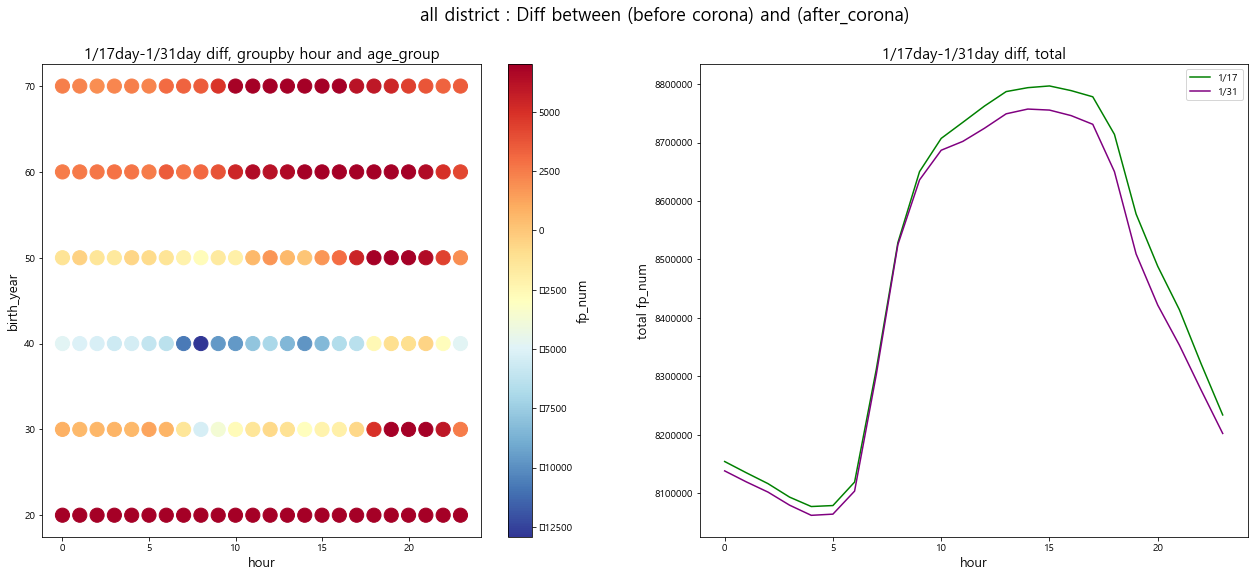

In [24]:
make_brith_hour_diff_plot(floating,'1/17', '1/31', 'all district')

사회적 거리두기 시행에 따른 유동인구 변화 추이 확인

In [25]:
SD_policy = policy[policy['gov_policy'] == 'Social Distancing Campaign'][['gov_policy', 'detail', 'start_date', 'end_date']]
SD_policy = SD_policy.reset_index(drop=True)
SD_policy

gov_policy  detail  start_date    end_date
0  Social Distancing Campaign  Strong  2020-03-22  2020-04-05
1  Social Distancing Campaign  Strong  2020-04-06  2020-04-19
2  Social Distancing Campaign    Weak  2020-04-20  2020-05-05

강력한 사회적 거리두기 기간 : 2020.03.22 ~ 2020.04.19


다소 완화한 사회적 거리두기 기간 : 2020.04.20 ~ 2020.05.05

1월 17일(코로나 발생 전)과 3월 22일(강력한 사회적 거리두기 첫날) 비교
#### -> 유동인구 감소 확인

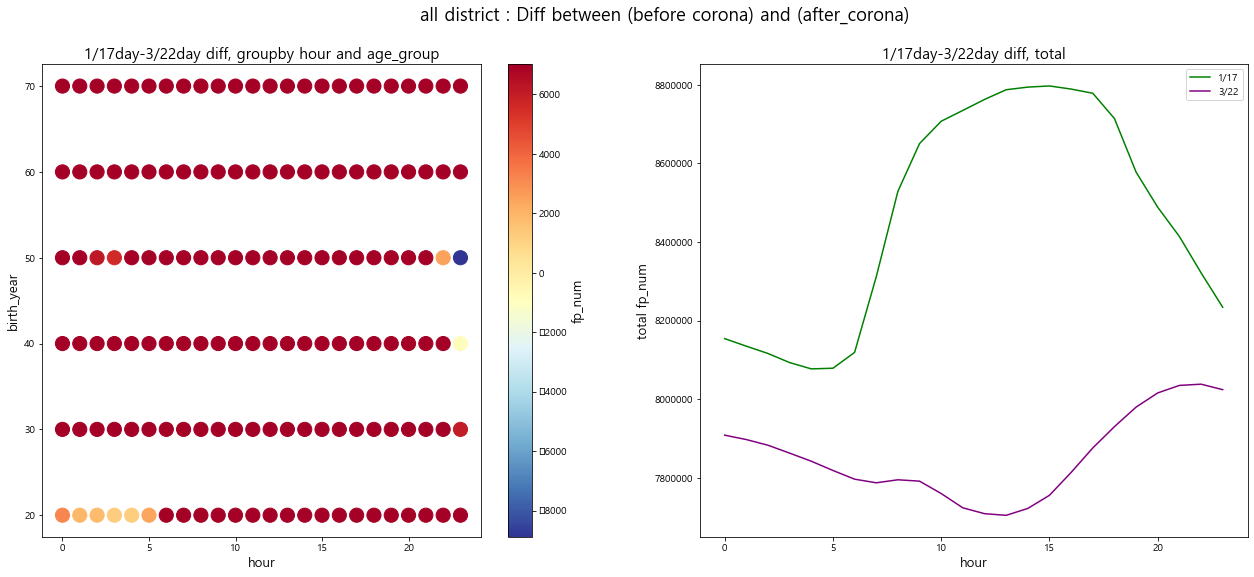

In [26]:
make_brith_hour_diff_plot(floating,'1/17', '3/22', 'all district')

1월 17일(코로나 발생 전)과 4월 20일(다소 완화한 사회적 거리두기 첫날) 비교
#### -> 유동인구 감소 확인

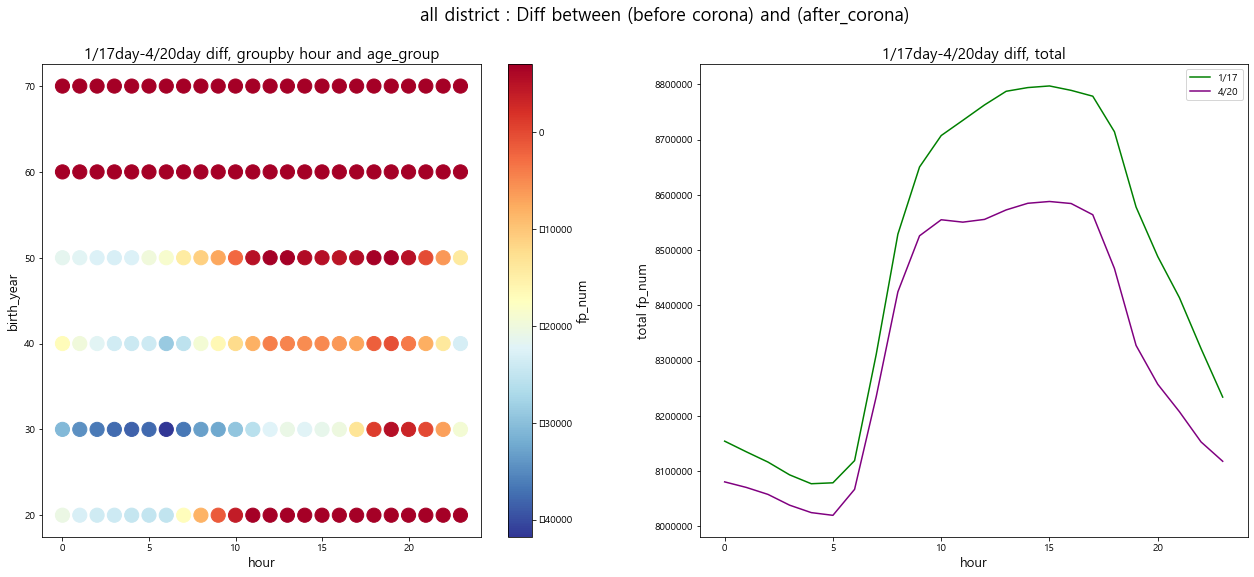

In [27]:
make_brith_hour_diff_plot(floating,'1/17', '4/20', 'all district')

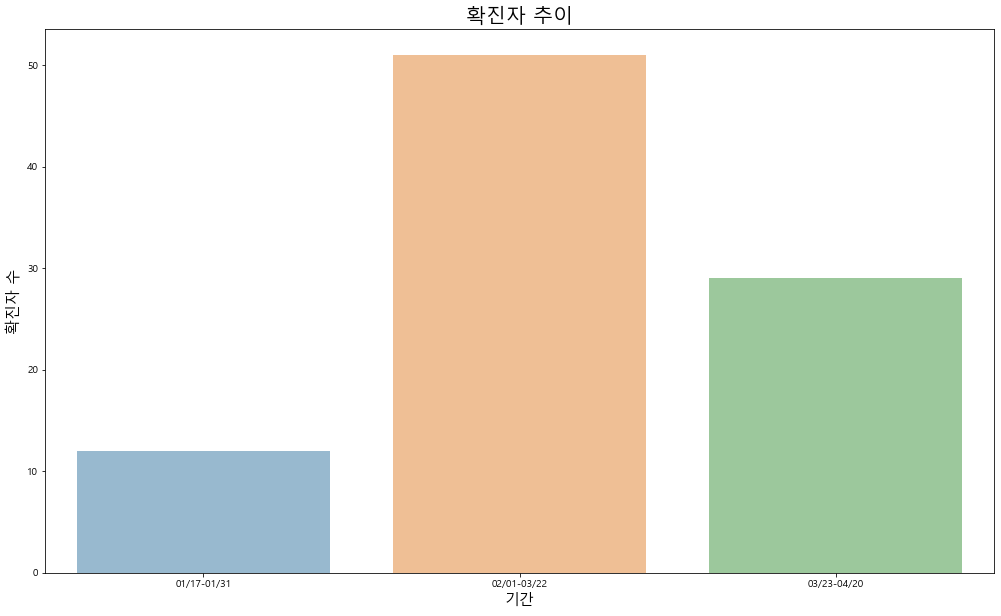

In [28]:
filtered_df1 = p1.loc[p1["date"].between('2020-01-17', '2020-01-31')]
filtered_df2 = p1.loc[p1["date"].between('2020-02-01', '2020-03-22')]
filtered_df3 = p1.loc[p1["date"].between('2020-03-23', '2020-04-20')]
Count = [len(filtered_df1), len(filtered_df2), len(filtered_df3)]
label = ['01/17-01/31','02/01-03/22','03/23-04/20']

plt.figure(figsize=(17,10))
sns.barplot(x=label, y=Count, alpha=0.5)
plt.title("확진자 추이",fontsize=20)
plt.xlabel("기간",fontsize=15)
plt.ylabel("확진자 수",fontsize=15)
plt.show()

#### 1. 확진자의 행동특성 분석
- 감염경로에선 확진 환자와의 접촉이 제일 큰 수치를 나타내었다.
- 감염특성 측면으로 봤을 땐 개개인의 감염이 집단 감염보다는 상대적으로  큰 수치를 나타내었다.
- 확진환자들의 이동경로를 의무적으로 가야하는 곳과 개인적으로 가는 곳으로 그룹화 하고 그 결과를 연령대 별로 확인해 보았을 때, 의무적으로 가는 곳의 비율은 대부분 비슷한데, 개인적인 동선은 20대가 상대적으로 높았다.

#### 2. 1월과 3,4월 유동인구 비교 분석
- 최초 코로나 발생일인 1월 20일 전후로는 1월 유동인구수가 높으며, 확진자 수는 다른 달에 비해 낮았다. 하지만 2월부터 확진자 수가 늘어나면서 정부는 3월22일부터 사회적 거리두기를 강화하였다.
- 정부는 4월 20일까지 거리두기를 시행하고 그 이후는 완화되었는데 확연히 확진자 수가 줄어듬을 알 수 있다.
- 그렇지만 4월 20일의 유동인구수가 1월의 유동인구 수와 비슷해지는 추세를 보이므로써 위험은 여전히 존재한다는 것을 알 수 있다.

### 사회적 거리두기에 대한 결론 도출
- 위 두가지 분석을 통해 우리는 다음과 같은 결론를 도출했다.
 1. 20대들의 위험의식이 낮아서 개인적인 동선이 많다는 점.
 2. 정부의 개입을 통해 사회적 거리두기를 시행하였을 때 전염이 줄어들고, 완화되었을 때 다시 확진자가 확 늘어날 수 있다.
 
 
 
- 이 두 가지 결론을 모두 해결할 방법으로는 사회적 거리두기와 같이 정부의 개입이 한두달 강하게 이루어져서 바이러스 확산을 막는 것이 해결책이라 생각한다. 물론 경제적 문제와 같은 여러가지 문제들이 많겠지만 앞으로도 계속 될 확산을 잡기 위한 방법이라 생각한다.